In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [26]:
%matplotlib inline
mpl.style.use({
    "font.size": 16,
    "figure.figsize": (14, 7),
    "axes.grid": True,
    "axes.autolimit_mode": "data",
    "axes.xmargin": 0,
    "axes.ymargin": 0
})

In [8]:
spark.read.parquet(
    "/user/joal/wmf/data/wmf/mediawiki/history/snapshot=2019-03"
).where("""
    wiki_db = "idwiki" and
    revision_parent_id = 0 and
    array_contains(revision_tags, "contenttranslation") and
    event_entity = "revision"
""").createOrReplaceTempView("idwiki_cx")

In [9]:
translations = spark.sql("""
select
    date_format(event_timestamp, "yyyy-MM") as month,
    sum(cast(not page_is_deleted as int)) as surviving_translations,
    sum(cast(page_is_deleted as int)) as deleted_translations
from idwiki_cx
group by
    date_format(event_timestamp, "yyyy-MM")
order by month asc
""")

In [11]:
translations1 = translations.withColumn(
    "deletion_rate",
    translations.deleted_translations / (translations.surviving_translations + translations.deleted_translations)
)

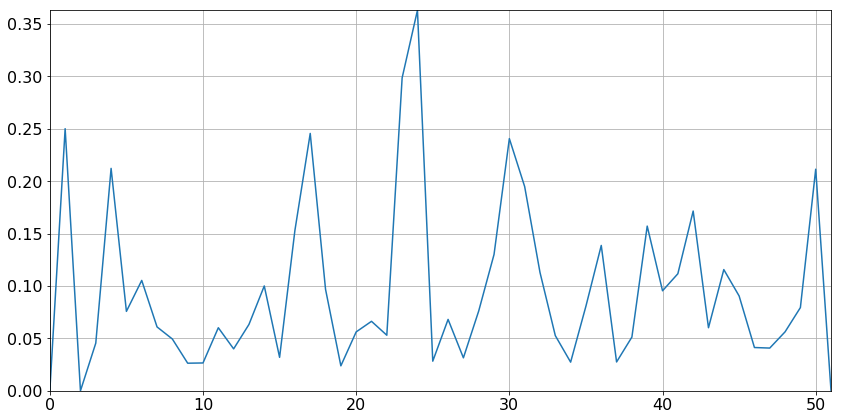

In [28]:
translations1.toPandas()["deletion_rate"].plot();

In [22]:
spark.sql("""
select
    event_user_text,
    count(*) as deleted_translations
from idwiki_cx
where
    date_format(event_timestamp, "yyyy-MM") = "2019-03" and
    page_is_deleted
group by event_user_text
order by deleted_translations desc
""").show(25)

+--------------------+--------------------+
|     event_user_text|deleted_translations|
+--------------------+--------------------+
|          Widialifah|                   9|
|           Adie Baim|                   8|
|             Eltha59|                   7|
|          Musakkarul|                   4|
|             Beehani|                   3|
|          Calvados22|                   2|
|      Ilhamcandraf76|                   1|
|       Mutia Fitri21|                   1|
|             S Rifqi|                   1|
|William Surya Per...|                   1|
|              Barked|                   1|
|          Bulansatya|                   1|
|           Aldiagung|                   1|
|         Rex Aurorum|                   1|
+--------------------+--------------------+



In [23]:
spark.sql("""
select
    event_user_text,
    count(*) as deleted_translations
from idwiki_cx
where
    date_format(event_timestamp, "yyyy-MM") = "2019-02" and
    page_is_deleted
group by event_user_text
order by deleted_translations desc
""").show(25)

+-----------------+--------------------+
|  event_user_text|deleted_translations|
+-----------------+--------------------+
|          Eltha59|                  12|
|        Ihsan joy|                   1|
|          Vorican|                   1|
|Rwijayayauw110395|                   1|
+-----------------+--------------------+



In [24]:
spark.sql("""
select
    event_user_text,
    count(*) as surviving_translations
from idwiki_cx
where
    date_format(event_timestamp, "yyyy-MM") = "2018-11" and
    not page_is_deleted
group by event_user_text
order by surviving_translations desc
""").show(25)

+-------------------+----------------------+
|    event_user_text|surviving_translations|
+-------------------+----------------------+
|         Adesio2010|                   242|
|         JohnThorne|                    62|
|          Veracious|                    43|
|      Indra prabowo|                    28|
|Elbert Ziv Hitipeuw|                    27|
|       Akmal agassi|                    18|
|         Masjawad99|                    13|
|          Pierrewee|                    11|
|            Nelvson|                     7|
|           Rizhmd21|                     6|
|            Yogwi21|                     6|
|          Joseagush|                     6|
|           Humboldt|                     4|
|        Bettychen84|                     4|
|  Jalu Rafli Ismail|                     4|
|         Aviel Dase|                     4|
|             Juxlos|                     3|
|               源あきら|                     2|
|             HaEr48|                     2|
|         